<a href="https://colab.research.google.com/github/Incredible-Dan/Data_Science_Projects/blob/master/Copy_of_Email_Spam_Detection_Project_colab_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [229]:
import warnings
from sklearn.exceptions import UndefinedMetricWarning

# Suppress only UndefinedMetricWarning
warnings.filterwarnings("ignore", category=UndefinedMetricWarning)
warnings.simplefilter("ignore", UndefinedMetricWarning)



#### **Import Important Libraries**


In [230]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, precision_score, classification_report, confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier



In [231]:
#### Importing Google Drive

In [232]:
#from google.colab import drive
#drive.mount('/content/drive/MyDrive/Email_spam.xlsx')


#### **Data Cleaning & Preparation**



In [233]:
# Loading the Dataset

email_df = pd.read_excel('/content/Email_spam.xlsx')
email_df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will �_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


#### **Removing Unwanted Columns**

In [234]:
email_df = email_df[['v1', 'v2']]  # Keep only relevant columns

In [235]:
# CHECKING THE DATA

In [236]:
email_df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [237]:
email_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [238]:
email_df.shape

(5572, 2)

In [239]:
email_df.describe()

,v1,v2
count,5572,5572
unique,2,5163
top,ham,"Sorry, I'll call later"
freq,4825,30


##### **Renaming the Columns**

In [240]:
email_df.columns = ['label', 'message']  # Rename columns

In [241]:
# CONFIRMING THE COLUMN NAME CHANGE

In [242]:
email_df.columns

Index(['label', 'message'], dtype='object')

#### **Data Cleaning**

In [243]:
# Clean data
email_df['label'] = email_df['label'].map({'ham': 0, 'spam': 1})  # Convert to binary
email_df.drop_duplicates(inplace=True)
email_df.dropna(inplace=True)
email_df

<ipython-input-243-55caa9446879>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  email_df['label'] = email_df['label'].map({'ham': 0, 'spam': 1})  # Convert to binary
<ipython-input-243-55caa9446879>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  email_df.drop_duplicates(inplace=True)
<ipython-input-243-55caa9446879>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  email_df.dr

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will �_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


####  **Adding text length feature**

In [244]:
# Add text length feature

# Ensure all values in 'message' column are strings before applying len()
email_df['msg_length'] = email_df['message'].astype(str).apply(len)

# Count digits while handling non-string values safely

email_df['num_digits'] = email_df['message'].astype(str).apply(lambda x: sum(c.isdigit() for c in x))

# Verify the updated DataFrame

print(email_df[['message', 'msg_length', 'num_digits']].head())


                                             message  msg_length  num_digits
0  Go until jurong point, crazy.. Available only ...         111           0
1                      Ok lar... Joking wif u oni...          29           0
2  Free entry in 2 a wkly comp to win FA Cup fina...         155          25
3  U dun say so early hor... U c already then say...          49           0
4  Nah I don't think he goes to usf, he lives aro...          61           0


<ipython-input-244-5bd841e42bbf>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  email_df['msg_length'] = email_df['message'].astype(str).apply(len)
<ipython-input-244-5bd841e42bbf>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  email_df['num_digits'] = email_df['message'].astype(str).apply(lambda x: sum(c.isdigit() for c in x))



### **Exploratory Data Analysis (EDA)**


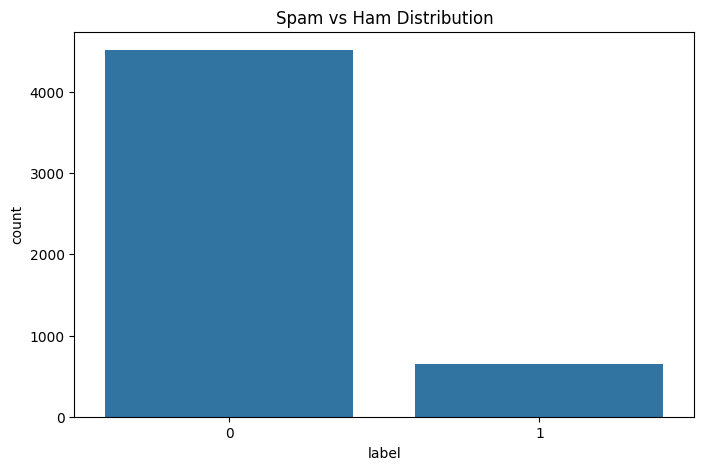

In [245]:
# Class distribution
plt.figure(figsize=(8,5))
sns.countplot(x='label', data=email_df)
plt.title('Spam vs Ham Distribution')
plt.show()

#### **Message Length Distribution Analysis**

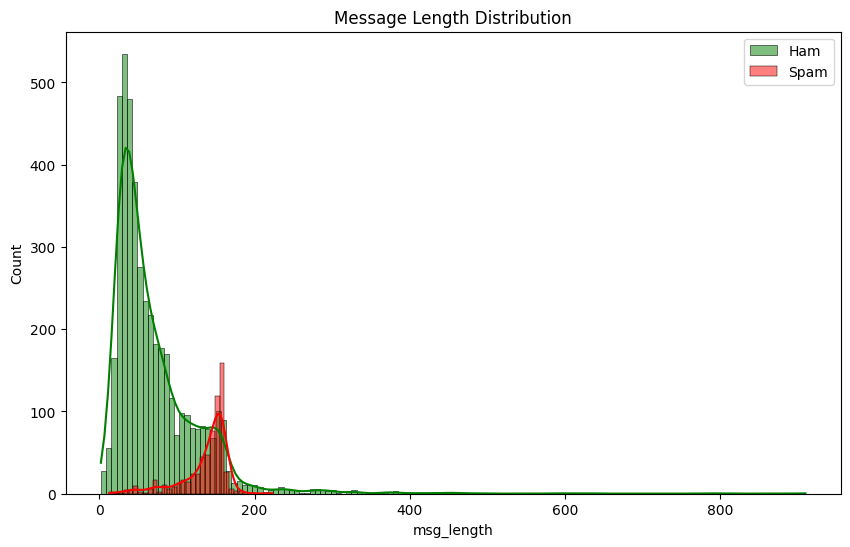

In [246]:
# Text length analysis
plt.figure(figsize=(10,6))
sns.histplot(email_df[email_df['label']==0]['msg_length'], color='green', label='Ham', kde=True)
sns.histplot(email_df[email_df['label']==1]['msg_length'], color='red', label='Spam', kde=True)
plt.title('Message Length Distribution')
plt.legend()
plt.show()

### **Message Length Distribution shows that:**
**Ham or Normal Emails had longer message length in the Dataset**

### **Distribution of Top Spam Word**

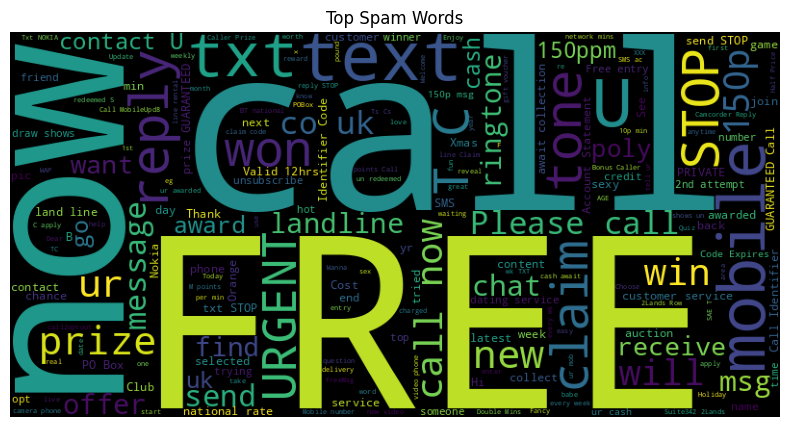

In [247]:
# Top spam words
from wordcloud import WordCloud

spam_words = ' '.join(email_df[email_df['label']==1]['message'])
wordcloud = WordCloud(width=800, height=400).generate(spam_words)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud)
plt.title('Top Spam Words')
plt.axis('off')
plt.show()


### **Distribution of TOP HAM or NOT SPAM WORD**

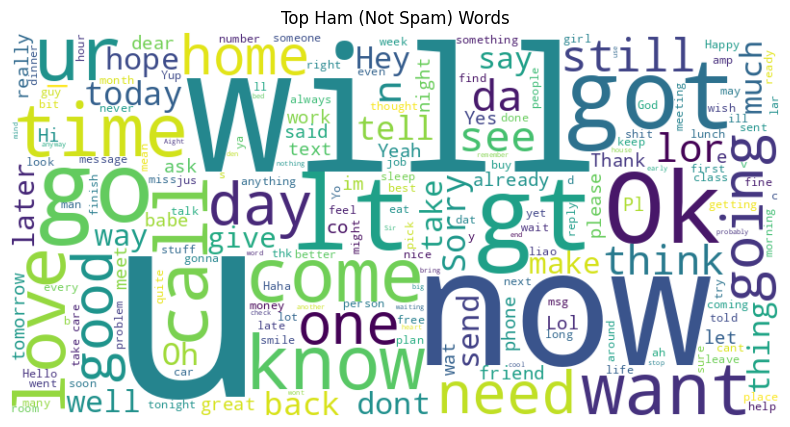

In [248]:
# Convert messages to string before joining
ham_words = ' '.join(email_df[email_df['label'] == 0]['message'].astype(str))

# Generate the word cloud
wordcloud_ham = WordCloud(width=800, height=400, background_color='white').generate(ham_words)

# Display the word cloud
plt.figure(figsize=(10,5))
plt.imshow(wordcloud_ham, interpolation='bilinear')
plt.title('Top Ham (Not Spam) Words')
plt.axis('off')
plt.show()


### **Most Frequent Words Analysis**


<ipython-input-249-6e73d717d541>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette='viridis')


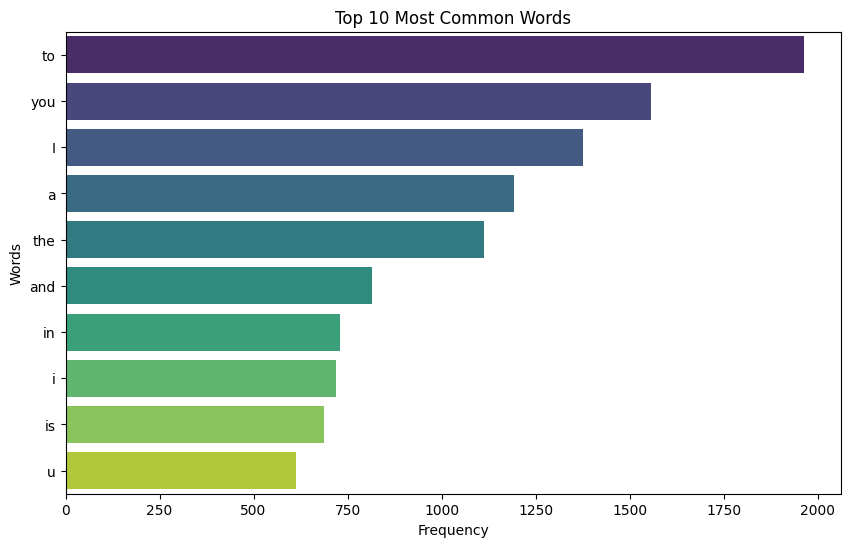

In [249]:

from collections import Counter

# --- Add these lines FIRST ---
email_df.loc[:, 'message'] = email_df['message'].fillna('')
email_df.loc[:, 'message'] = email_df['message'].astype(str)
  # Convert to strings
# -----------------------------

all_words = ' '.join(email_df['message']).split()
word_freq = Counter(all_words)
common_words = word_freq.most_common(10)

# Bar chart
words, counts = zip(*common_words)
plt.figure(figsize=(10, 6))
sns.barplot(x=list(counts), y=list(words), palette='viridis')
plt.title('Top 10 Most Common Words')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.show()

In [250]:
print(email_df.columns)


Index(['label', 'message', 'msg_length', 'num_digits'], dtype='object')



#### **Model Training & Evaluation**


#### **Text vectorization**

In [251]:

# Convert all messages to string to avoid the 'int' object error

email_df['message'] = email_df['message'].astype(str)

# Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=5000)

# Fit and transform the message column
X = tfidf.fit_transform(email_df['message'])

# Define target variable
y = email_df['label']


<ipython-input-251-2ff9bba9380e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  email_df['message'] = email_df['message'].astype(str)


#### **Splitting the Dataset into Train-test split**

In [252]:
# Train-test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#### **Model Building**

In [253]:
# Model configuration
models = {
    'Naive Bayes': (MultinomialNB(), {'alpha': [0.1, 1.0]}),
    'SVM': (SVC(), {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}),
    'Logistic Regression': (LogisticRegression(), {'C': [0.1, 1, 10]}),
    'Random Forest': (RandomForestClassifier(), {'n_estimators': [50, 100]}),
    'Gradient Boosting': (GradientBoostingClassifier(), {'n_estimators': [50, 100]}),
}


#### **Model training and evaluation**

In [254]:

results = []
for name, (model, params) in models.items():
    # Hyperparameter tuning
    grid = GridSearchCV(model, params, cv=5, scoring='precision')
    grid.fit(X_train, y_train)
    print(f"{name} - Best Params: {grid.best_params_}")


Naive Bayes - Best Params: {'alpha': 1.0}
SVM - Best Params: {'C': 0.1, 'kernel': 'linear'}
Logistic Regression - Best Params: {'C': 1}
Random Forest - Best Params: {'n_estimators': 100}
Gradient Boosting - Best Params: {'n_estimators': 100}


#### **Best Model Prediction**

In [255]:
# Best model

best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)
print(best_model)

GradientBoostingClassifier()


In [256]:
# Save the trained model

import joblib

joblib.dump(best_model, 'spam_model.pkl')

# Save the vectorizer
joblib.dump(tfidf, 'tfidf_vectorizer.pkl')

print("Model and vectorizer saved successfully!")


Model and vectorizer saved successfully!


In [257]:
#### Download the files

In [258]:
from google.colab import files
files.download('spam_model.pkl')
files.download('tfidf_vectorizer.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### **Best Model Prediction**

In [259]:
# Best model

best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)


In [260]:

# Save the trained model
joblib.dump(best_model, 'spam_model.pkl')

['spam_model.pkl']

#### **Storing the Rsults**

In [261]:
 # Store results
results.append({
    'Model': name,
    'Accuracy': accuracy_score(y_test, y_pred),
    'Precision': precision_score(y_test, y_pred),
    'Best Params': grid.best_params_
})

#### **Comparison of the Results**

In [262]:
# Results comparison

results_df = pd.DataFrame(results)
print("Model Performance Comparison:")
print(results_df.sort_values(by='Precision', ascending=False))


Model Performance Comparison:
               Model  Accuracy  Precision            Best Params
0  Gradient Boosting   0.96515   0.934783  {'n_estimators': 100}


## **Performance comparison of the Gradient Boosting model based on three key metrics:**

### **Results of Model Testing for Email Classification as either SPAM or Not SPAM**

###### **1:   Best Model: Gradient Boosting.**


##### This is the machine learning model that performed best in detecting spam emails.
###### **2:   Accuracy: 96.52%.**


##### This means the model correctly classified 96.52% of all emails (both spam and non-spam).


###### **3:     Precision: 93.48%.**


##### Precision measures how many emails the model flagged as spam were actually spam.

##### A higher precision (93.48%) means fewer false positives (non-spam emails mistakenly marked as spam).


###### **4:      Best Params: {'n_estimators': 100}.**


##### This shows that the best-performing Gradient Boosting model used 100 trees for decision-making.

### **What This Means for Spam Detection.**

###The model is highly accurate and reliable in distinguishing spam from real emails.

###High precision means users are less likely to miss important emails due to false spam classification.

###Gradient Boosting is the best model for this task compared to others tested.


#### **Best Model Analysis**



#### **Confusion matrix for best model**

In [263]:
# Confusion matrix for best model
best_model = SVC(C=10, kernel='linear').fit(X_train, y_train)
y_pred = best_model.predict(X_test)


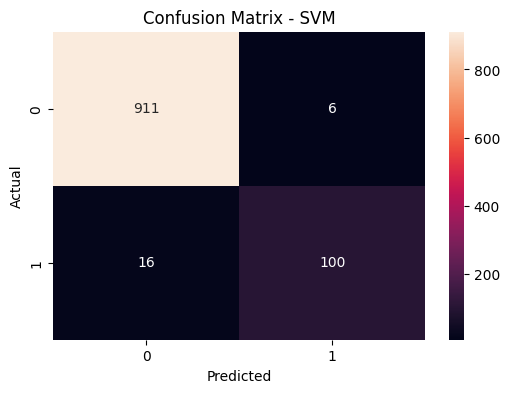

In [264]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.title('Confusion Matrix - SVM')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [265]:
# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       917
           1       0.94      0.86      0.90       116

    accuracy                           0.98      1033
   macro avg       0.96      0.93      0.94      1033
weighted avg       0.98      0.98      0.98      1033



In [268]:
!git init


Reinitialized existing Git repository in /content/.git/


In [270]:
!umount /content/drive


In [271]:
!git add .

In [272]:
!git commit -am "Initial Email spam project commit"


Author identity unknown

*** Please tell me who you are.

Run

  git config --global user.email "you@example.com"
  git config --global user.name "Your Name"

to set your account's default identity.
Omit --global to set the identity only in this repository.

fatal: unable to auto-detect email address (got 'root@27becd800c45.(none)')
